# Generating string diagrams

For any higher-dimensional diagram that we can create in `rewalt`, we can output a *string diagram* representation both as an image (with the Matplotlib backend), or as TikZ code that we can include in our LaTeX files.

Thus, one of the intended applications of `rewalt` is also to be a structure-aware, type-aware string diagram generator: we can build our string diagrams the way we build the morphisms/homotopies/operations/rewrites that they represent, and let `rewalt` do the typesetting for us.

In this notebook, we will work out one example, and explore the customisation options that we have. 

Note that the placement and general style of nodes and wires is not currently customisable (except for the choice of orientation). However, `rewalt` is open source software and everyone is welcome to modify the algorithm to suit their aesthetic preferences.

## A presentation of adjunctions

As an example, we will construct a presentation of the "theory of adjunctions", or "walking adjunction", whose models in a bicategory are adjunctions internal to that bicategory. (This has "dualities in monoidal categories" as a special case.) The triangle/zigzag/snake equations of adjunctions are some of the most well-known and recognisable in string diagrams.

The theory of adjunctions has two 0-cells and two 1-cells between them, going in opposite directions.

In [1]:
import rewalt

Adj = rewalt.DiagSet()
x = Adj.add('x')
y = Adj.add('y')
l = Adj.add('l', x, y)
r = Adj.add('r', y, x)

Then, we need to add two 2-cells, the *unit* and *counit* of the adjunction.

In [2]:
eta = Adj.add('η', x.unit(), l.paste(r))  # unit
eps = Adj.add('ε', r.paste(l), y.unit())  # counit

This is how `rewalt` draws the unit and counit by default.

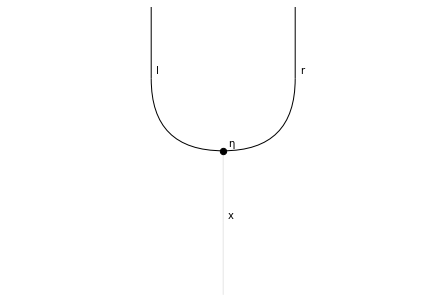

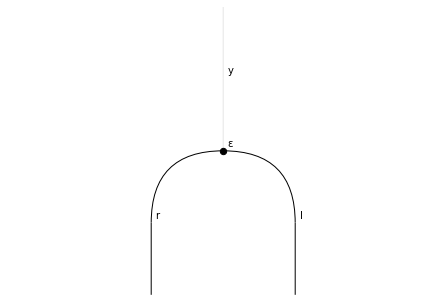

In [3]:
eta.draw()
eps.draw()

We can use the picture as a visual aid to see how to paste the unit and counit together to get the left-hand side of the triangle equations. For example, if we add an `l` to the *right* of `eta`...

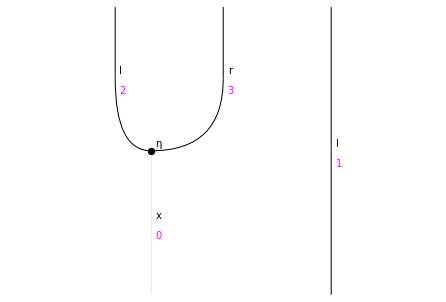

In [4]:
eta.paste(l).draw(wirepositions=True)

... we can plug an `eps` to the wires in positions (3, 1).

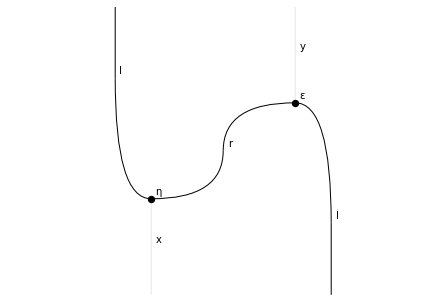

In [5]:
lhs1 = eta.paste(l).to_outputs([3, 1], eps)
lhs1.draw()

This needs to be equated to "the identity on `l`", except we have weak units on `x` in the input and on `y` in the output.

We can in fact obtain the degenerate 2-cell with the right type as one of the *cubical degeneracies* on `l`.

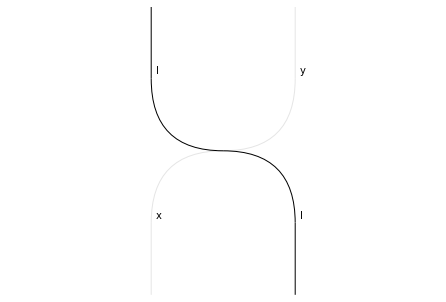

In [6]:
rhs1 = l.cube_degeneracy(1)
rhs1.draw()

We can now add our first "oriented equation".

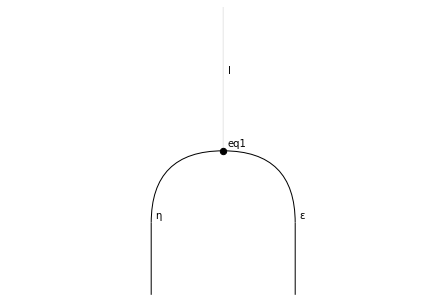

In [7]:
eq1 = Adj.add('eq1', lhs1, rhs1)
eq1.draw()

For the second one, we can proceed symmetrically. We add an `r` to the *left* of `eta`...

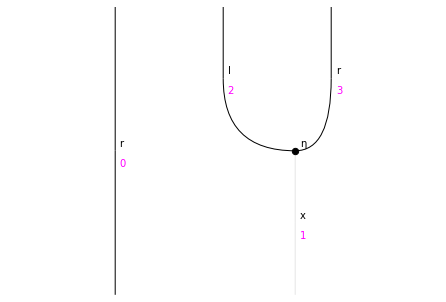

In [8]:
r.paste(eta).draw(wirepositions=True)

... and we plug an `eps` to the wires in positions (0, 2) to get the left-hand side of the second equation.

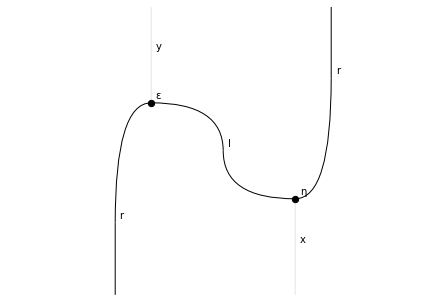

In [9]:
lhs2 = r.paste(eta).to_outputs([0, 2], eps)
lhs2.draw()

To get the right-hand-side, we use a different cubical degeneracy on `r`.

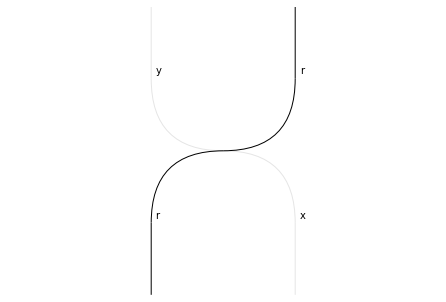

In [10]:
rhs2 = r.cube_degeneracy(0)
rhs2.draw()

And finally, we add the second triangle equation.

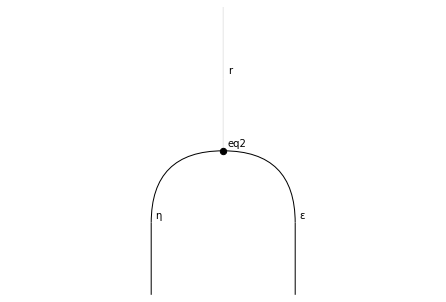

In [11]:
eq2 = Adj.add('eq2', lhs2, rhs2)
eq2.draw()

That's it, we have a presentation. (We could also invert `eq1` and `eq2` but that's besides the point of this exercise).

## Customising string diagrams

Let's return to the first triangle equation. The default string diagram representation of its left-hand side is this.

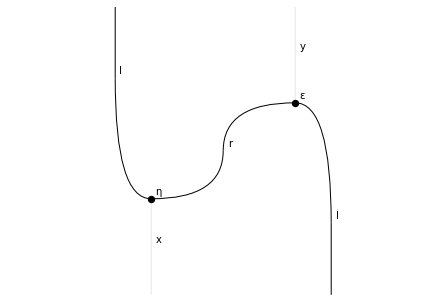

In [12]:
eq1.input.draw()

Let's make it a bit nicer.

First of all, it is quite common to draw units and counits as "bent wires" (aka "cups and caps"), without a node, so that the triangle equations look like topological trivialities.

We can do this by disabling node drawing for these generators of `Adj`.

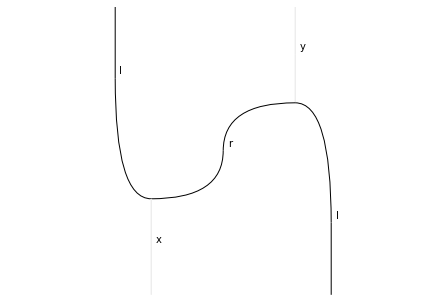

In [13]:
Adj.update('ε', draw_node=False)
Adj.update('η', draw_node=False)
eq1.input.draw()

Then, since we have only two 1-cells, why not also colour-code them?

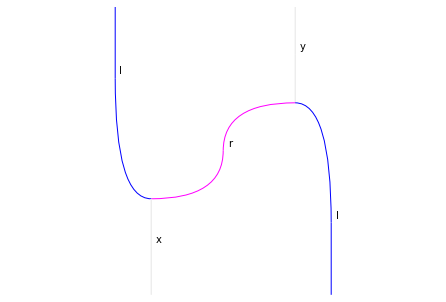

In [14]:
Adj.update('l', color='blue')
Adj.update('r', color='magenta')
eq1.input.draw()

When we are working in `rewalt`, it is good to see the weak units, because we need to take them into account to know that everything typechecks.

However, we may want to "hide them away" if, for example, our diagrams are to be interpreted in a strict 2-category. We can do this by changing the alpha factor for degenerate wires to 0.

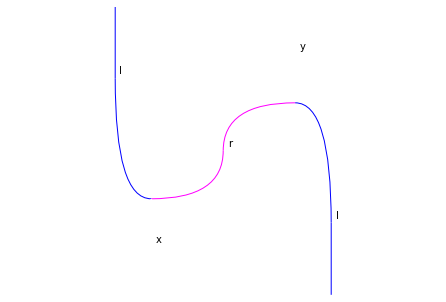

In [15]:
eq1.input.draw(degenalpha=0)

Note that this still shows the weak unit labels, which is actually helpful in this setting because it reminds us of the type of `l` and `r`. If we wanted to get rid of them, we could deactivate labels for these generators.

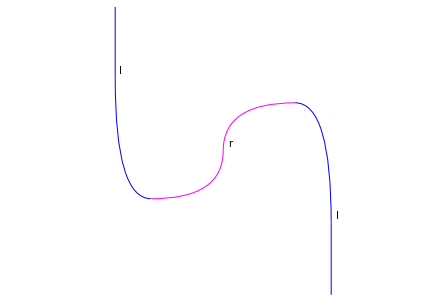

In [16]:
Adj.update('x', draw_label=False)
Adj.update('y', draw_label=False)
eq1.input.draw(degenalpha=0)

In [17]:
Adj.update('x', draw_label=True)
Adj.update('y', draw_label=True)

There are different factions on what the "correct" orientation of string diagrams is. In `rewalt`, the default is bottom-to-top, but it can be changed.

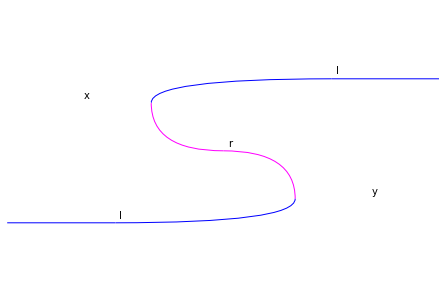

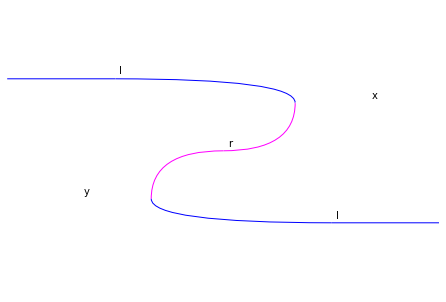

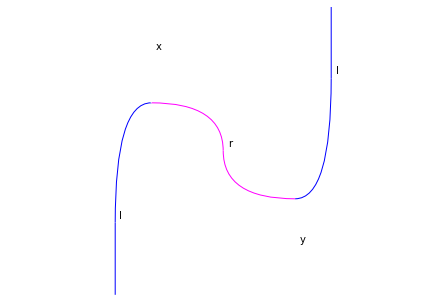

In [18]:
eq1.input.draw(degenalpha=0, orientation='lr')
eq1.input.draw(degenalpha=0, orientation='rl')
eq1.input.draw(degenalpha=0, orientation='tb')

We can change the default settings by reassigning the values of `rewalt.strdiags.DEFAULT`. Let's say we want all our string diagrams to be top-to-bottom with no degenerate wires.

In [19]:
rewalt.strdiags.DEFAULT['orientation'] = 'tb'
rewalt.strdiags.DEFAULT['degenalpha'] = 0

Now, how about a dark theme?

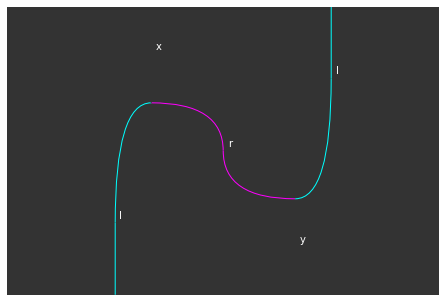

In [20]:
Adj.update('l', color='cyan')
eq1.input.draw(bgcolor='0.2', fgcolor='white')

Let's see what the sides of our two triangle equations look like now.

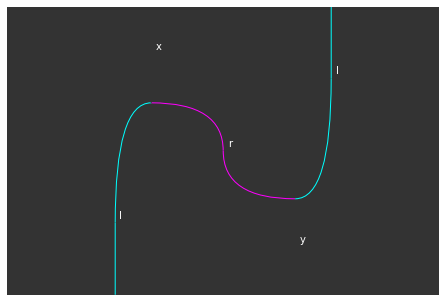

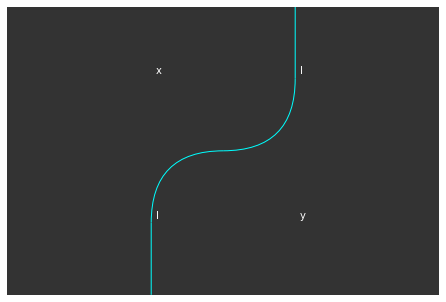

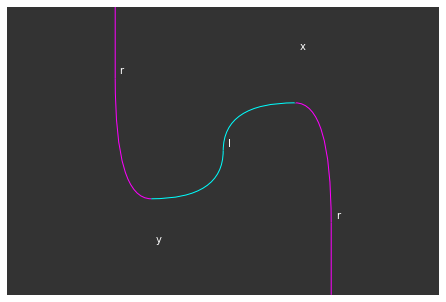

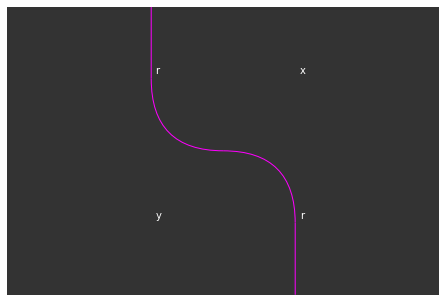

In [21]:
eq1.draw_boundaries(bgcolor='0.2', fgcolor='white')
eq2.draw_boundaries(bgcolor='0.2', fgcolor='white')

If we are happy with the look, we can output TikZ code. Note that both labels and colour settings are passed to the TikZ output as they are, so we should change the background colour setting to something that LaTeX can recognise.

TikZ output uses coordinates in $[0, 1] \times [0, 1]$. Since this is quite small, the output is scaled 3x by default; this can be changed with the `scale`, `xscale`, and `yscale` keyword arguments.

Also, by default, all wires are drawn with a contour, which is useful in higher dimensions when wires can overlap. Since we are in 2d and this doesn't happen, we can avoid drawing contours by setting the `depth` keyword argument to `False`.

In [22]:
eq1.input.draw(
    bgcolor='darkgray', fgcolor='white', depth=False,
    tikz=True, xscale=8, yscale=6, path='stringdiagrams_1.tex')

Here's the generated [TikZ code](stringdiagrams_1.tex) and the [output PDF](stringdiagrams_1.pdf) compiled with pdflatex.

## Fun with higher-dimensional shapes

We can have string diagram representations not only of "diagrams in a `DiagSet`", but also of *shapes* and *maps of shapes* of diagrams.

For example, this is the shape of the diagram we have been using as example.

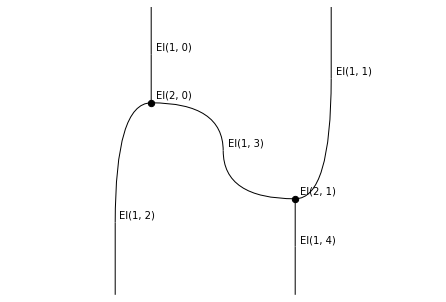

In [23]:
eq1.input.shape.draw()

Every wire and node corresponds to a unique face of the diagram shape, specified by its dimension (2 for nodes, 1 for wires) and position. We can match them to elements of the *oriented face poset* of the diagram shape.

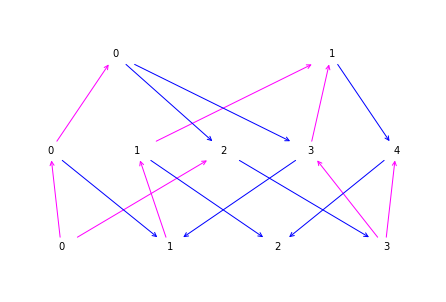

In [24]:
eq1.input.shape.hasse(labels=False)

A quick way to get some interesting higher-dimensional diagrams, and see some of the things that happen with string diagram representations in higher dimensions, is to use some of the constructors for special higher-dimensional shapes, such as simplices and cubes.

For example, these are the string diagrams for the 3-dimensional boundaries of the oriented 4-cube.

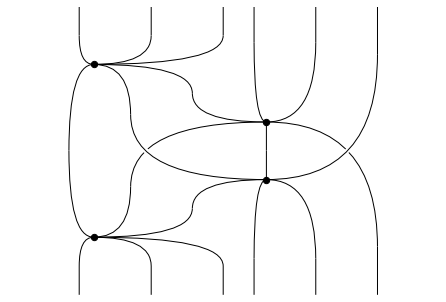

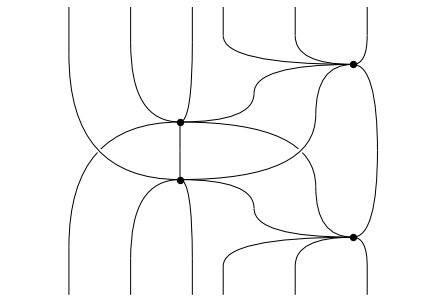

In [25]:
tesseract = rewalt.Shape.cube(4)
tesseract.draw_boundaries(labels=False)

You can see that wires can cross each other in 3-dimensional diagrams.

For something even more complicated, let's look at a *cubical connection* map on the 4-cube, which is a surjective map from the 5-cube. 

(Since this will contain many degenerate cells, we will reinstate weak units in string diagrams.)

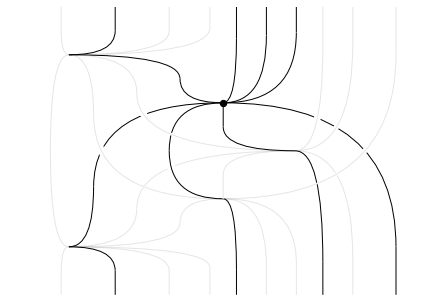

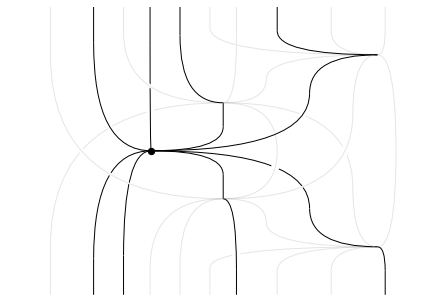

In [26]:
connection = tesseract.cube_connection(1, '-')
connection.draw_boundaries(labels=False, degenalpha=0.1)

And let's play a little bit with colours.

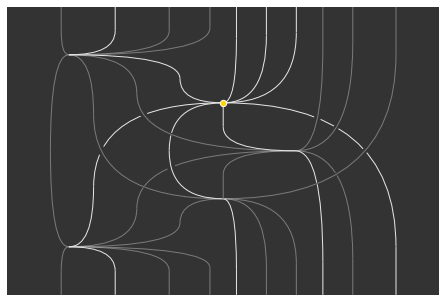

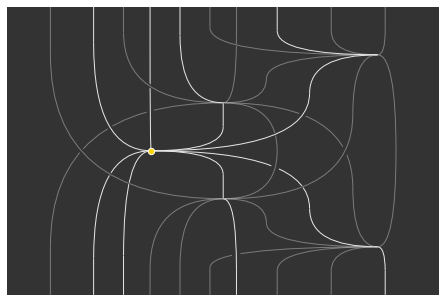

In [27]:
connection.draw_boundaries(
    labels=False, bgcolor='0.2', fgcolor='0.9', degenalpha=0.4,
    nodecolor='gold', nodestroke='white')

Looks nice, no?